In [1]:
import pandas as pd
import json
import os
import glob
from IPython.display import display

import sys
sys.path.append('/python')
import connections as con

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dokumentation for API https://www.wunderground.com/weather/api/d/docs?d=data/history

Kolonner: https://www.wunderground.com/weather/api/d/docs?d=resources/phrase-glossary

In [3]:
#henter vejrdata fra folder til DF
observations = []
path = 'data/weather/'
for file in glob.glob( os.path.join(path, '*.json') ):
    with open(file) as f:
        data = json.load(f)
        #extract observations from json
        obs = [x for x in data['history']['observations']]
        observations.append(pd.DataFrame(obs))

#samler vejrdata
df = pd.concat(observations)

# Tilretning

In [4]:
#Dato sættes som index
df['date'] = df['date'].apply( lambda x: pd.to_datetime(f"{x['year']}-{x['mon']}-{x['mday']} {x['hour']}:{x['min']}"))
df.set_index('date', inplace=True)

In [12]:
df.columns

Index(['conds', 'dewpti', 'dewptm', 'fog', 'hail', 'heatindexi', 'heatindexm',
       'hum', 'icon', 'metar', 'precipi', 'precipm', 'pressurei', 'pressurem',
       'rain', 'snow', 'tempi', 'tempm', 'thunder', 'tornado', 'utcdate',
       'visi', 'vism', 'wdird', 'wdire', 'wgusti', 'wgustm', 'windchilli',
       'windchillm', 'wspdi', 'wspdm'],
      dtype='object')

#### Numeric columns

In [5]:
num_col = ['dewpti', 'dewptm', 'fog', 'hail', 'heatindexi', 'heatindexm',
       'hum', 'precipi', 'precipm', 'pressurei', 'pressurem',
       'rain', 'snow', 'tempi', 'tempm', 'thunder', 'tornado', 
       'visi', 'vism', 'wdird', 'wgusti', 'wgustm', 'windchilli',
       'windchillm', 'wspdi', 'wspdm']

In [6]:
df[num_col] = df[num_col].apply(pd.to_numeric)

# Til Postgres

In [7]:
engine = con.engine('distribution')

In [2]:
query = 'select * from weather.weather'
df = con.sql_to_dataframe('distribution', query)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20289 entries, 0 to 20288
Data columns (total 33 columns):
id            20289 non-null int64
date          20289 non-null object
conds         20289 non-null object
dewpti        20289 non-null object
dewptm        20289 non-null object
fog           20289 non-null object
hail          20289 non-null object
heatindexi    20289 non-null object
heatindexm    20289 non-null object
hum           20289 non-null object
icon          20289 non-null object
metar         20289 non-null object
precipi       20289 non-null object
precipm       20289 non-null object
pressurei     20289 non-null object
pressurem     20289 non-null object
rain          20289 non-null object
snow          20289 non-null object
tempi         20289 non-null object
tempm         20289 non-null object
thunder       20289 non-null object
tornado       20289 non-null object
utcdate       20289 non-null object
visi          20289 non-null object
vism          20289 non-null

# Plotting

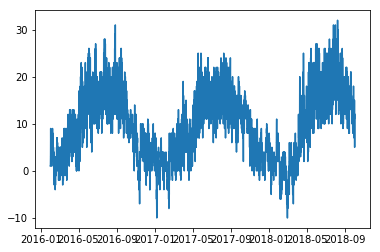

In [34]:
plt.plot(df.reset_index()['date'], pd.to_numeric(df['tempm']))

In [27]:
df.to_csv('test.csv')

# Gammelt

In [2]:
#henter vejrdata fra folder til DF
weather_lst = []
path = 'data/weather/'
for file in glob.glob( os.path.join(path, '*.json') ):
    with open(file) as f:
        data = json.load(f)
        weather = data['history']['dailysummary']
        weather_lst.append(pd.DataFrame(weather))

#samler vejrdata
obs = pd.concat(weather_lst)

## Klargøre DF med udvalgte observationer og tilretter


In [9]:
#Dato sættes som index
obs['dato'] = obs['date'].apply( lambda x: pd.to_datetime(x['year'] + '-' + x['mon'] + '-' + x['mday']) )
obs.set_index('dato', inplace=True)
col_old = 'meantempm maxtempm mintempm meanwindspdm maxwspdm minwspdm fog rain snow humidity precipm'.split(' ')
#Gør datatype numerisk for kolonner
obs[col_old] = obs[col_old].apply(pd.to_numeric)

#col_new = 'gns_temp max_temp min_temp gns_vindhast max_vindhast min_vindhast taage regn sne luftfugt nedboer'.split(' ')
#col_rename = dict(zip(col_old, col_new))

vejr = obs[col_old]

In [16]:
k

range(1, 10)

# Visualisering

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

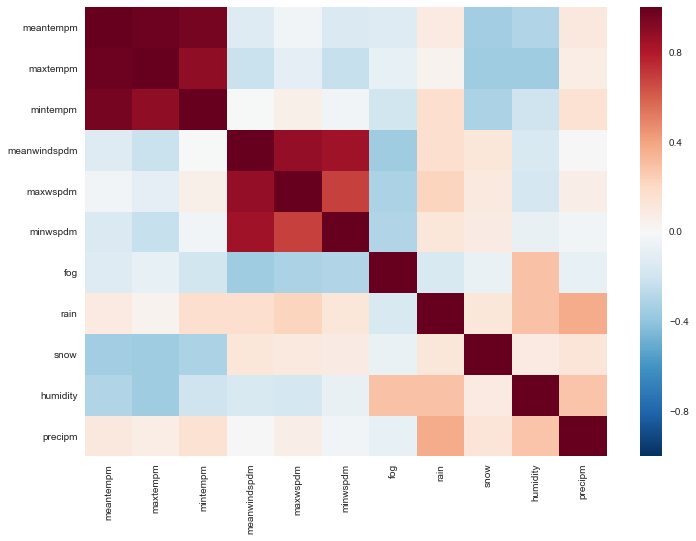

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(vejr.corr())

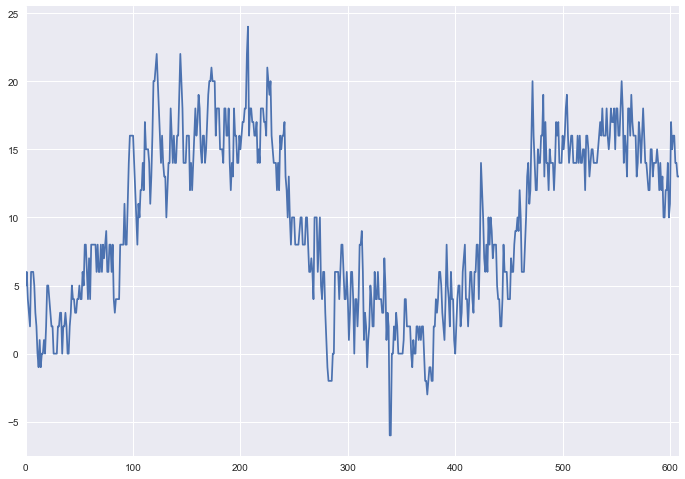

In [8]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.tsplot(vejr['meantempm'])

In [160]:
vejr.to_csv('vejret.csv', sep=';', encoding='utf-8')